<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,48.481650,37.293776,45.136774,51.712753,0.128149,192.753101,192.453082,0.300019
1,0.0,1.0,84.088126,46.317490,61.499743,56.864026,-0.545787,258.223597,258.676163,-0.452566
2,0.0,2.0,37.073327,44.663800,31.513034,85.051779,0.692578,208.994519,208.521094,0.473424
3,0.0,3.0,70.986771,98.809577,71.929248,40.896853,-0.569323,292.053126,292.143082,-0.089956
4,0.0,4.0,41.766080,20.801710,87.981283,22.727995,-0.824172,182.452896,182.845044,-0.392148
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.716878,43.795474,92.022872,81.890247,-0.417440,309.008033,309.469819,-0.461786
19996,999.0,16.0,73.295260,90.046240,80.564500,77.747321,-0.145492,331.507828,331.785955,-0.278127
19997,999.0,17.0,79.617727,86.096677,92.855938,41.125300,0.757603,310.453244,309.760816,0.692428
19998,999.0,18.0,58.394266,61.807039,69.408835,84.961710,0.033891,284.605740,284.601746,0.003995


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,48.481650,37.293776,45.136774,51.712753,0.128149,192.753101,192.453082,0.300019
1,0.0,1.0,84.088126,46.317490,61.499743,56.864026,-0.545787,258.223597,258.676163,-0.452566
2,0.0,2.0,37.073327,44.663800,31.513034,85.051779,0.692578,208.994519,208.521094,0.473424
3,0.0,3.0,70.986771,98.809577,71.929248,40.896853,-0.569323,292.053126,292.143082,-0.089956
4,0.0,4.0,41.766080,20.801710,87.981283,22.727995,-0.824172,182.452896,182.845044,-0.392148
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.716878,43.795474,92.022872,81.890247,-0.417440,309.008033,309.469819,-0.461786
19996,999.0,16.0,73.295260,90.046240,80.564500,77.747321,-0.145492,331.507828,331.785955,-0.278127
19997,999.0,17.0,79.617727,86.096677,92.855938,41.125300,0.757603,310.453244,309.760816,0.692428
19998,999.0,18.0,58.394266,61.807039,69.408835,84.961710,0.033891,284.605740,284.601746,0.003995


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,48.481650,37.293776,45.136774,51.712753,0.128149,192.753101,192.453082,0.300019
1,0.0,1.0,84.088126,46.317490,61.499743,56.864026,-0.545787,258.223597,258.676163,-0.452566
2,0.0,2.0,37.073327,44.663800,31.513034,85.051779,0.692578,208.994519,208.521094,0.473424
3,0.0,3.0,70.986771,98.809577,71.929248,40.896853,-0.569323,292.053126,292.143082,-0.089956
4,0.0,4.0,41.766080,20.801710,87.981283,22.727995,-0.824172,182.452896,182.845044,-0.392148
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.716878,43.795474,92.022872,81.890247,-0.417440,309.008033,309.469819,-0.461786
19996,999.0,16.0,73.295260,90.046240,80.564500,77.747321,-0.145492,331.507828,331.785955,-0.278127
19997,999.0,17.0,79.617727,86.096677,92.855938,41.125300,0.757603,310.453244,309.760816,0.692428
19998,999.0,18.0,58.394266,61.807039,69.408835,84.961710,0.033891,284.605740,284.601746,0.003995


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

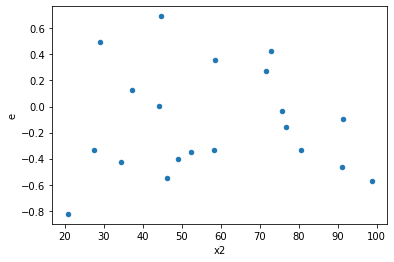

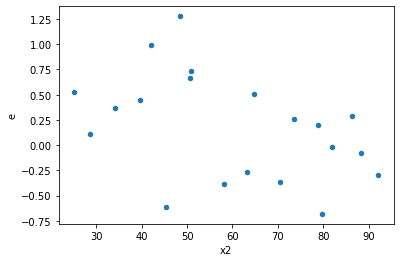

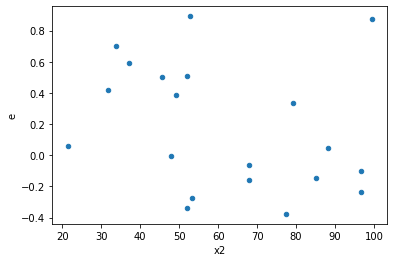

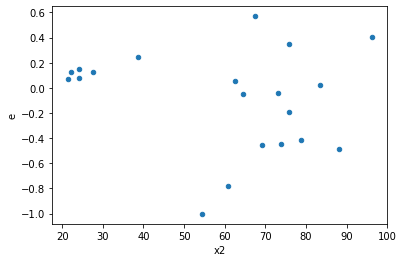

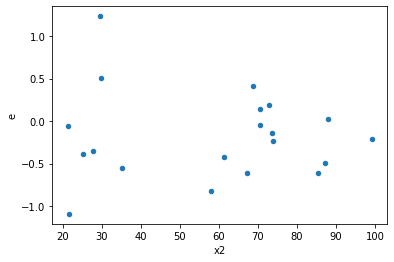

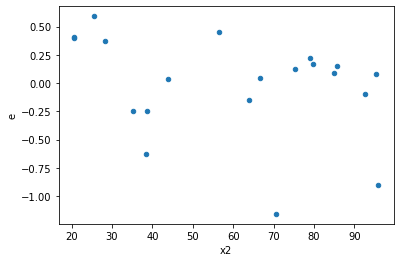

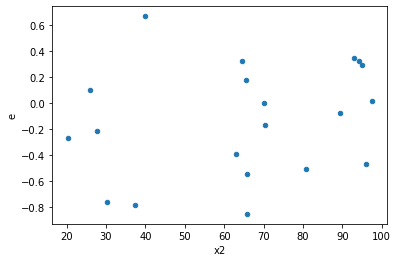

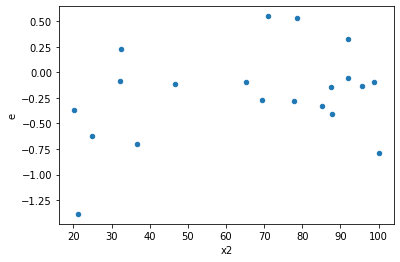

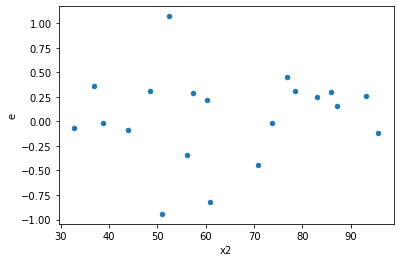

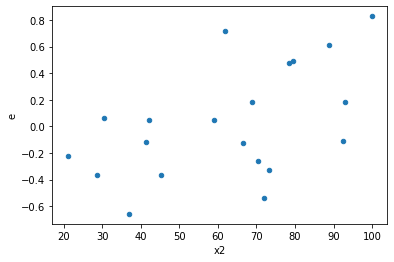

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,0.47020661756859644,0.7113823233826588,0.11755165439214911,0.1778455808456647,1.5129143163938528,0.6980847715232601,0.65095761423837,0.34904238576163005,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,0.4283579635918663,0.4411946328982215,0.10708949089796657,0.11029865822455537,1.0299671545702505,0.9778580326221307,0.5110709836889347,0.48892901631106533,Reject001=1 : Homoscedasticity
10.0,4.0,4.0,0.30685459727837017,0.5654618592505577,0.07671364931959254,0.14136546481263942,1.8427680871197314,0.5683372068765338,0.7158313965617331,0.2841686034382669,Reject001=1 : Homoscedasticity
13.0,4.0,4.0,0.5304816080462579,1.0124343501927566,0.13262040201156447,0.25310858754818916,1.9085192301416651,0.5466916986869652,0.7266541506565174,0.2733458493434826,Reject001=1 : Homoscedasticity
14.0,4.0,4.0,0.8894335193849615,0.9371140275926222,0.22235837984624038,0.23427850689815555,1.0536077257810472,0.9608526386186145,0.5195736806906928,0.48042631930930724,Reject001=1 : Homoscedasticity
16.0,4.0,4.0,0.46133044497766507,1.4384170942799046,0.11533261124441627,0.35960427356997615,3.117975650511304,0.2965403319375033,0.8517298340312484,0.14827016596875164,Reject001=1 : Homoscedasticity
18.0,4.0,4.0,0.29866402336026343,1.0080444632573566,0.07466600584006586,0.25201111581433916,3.3751787440478,0.2656828655693457,0.8671585672153271,0.13284143278467286,Reject001=1 : Homoscedasticity
19.0,4.0,4.0,0.42179851209942193,0.657561958223985,0.10544962802485548,0.16439048955599625,1.5589480269882776,0.6775674988380973,0.6612162505809513,0.33878374941904865,Reject001=1 : Homoscedasticity
20.0,4.0,4.0,0.13647060981653908,0.24890707148689664,0.03411765245413477,0.06222676787172416,1.8238877353996494,0.5747826124944524,0.7126086937527738,0.2873913062472262,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.6190120776305648,0.0596545207467402,0.1547530194076412,0.01491363018668505,0.09637052797916952,0.04364146688257778,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.47020661756859644,0.7113823233826588,0.11755165439214911,0.1778455808456647,1.5129143163938528,0.6980847715232601,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,0.2674078513764544,0.2202989593934938,0.0668519628441136,0.05507473984837345,0.8238313058480803,0.8555616404130908,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,1.0531863506081691,0.3561904047590839,0.2632965876520423,0.08904760118977098,0.3382026405425778,0.3186625540438768,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,0.8167272831483658,0.260188238799081,0.20418182078709146,0.06504705969977025,0.31857419749232924,0.2938251755743585,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.21051570030786648,0.08261705555438004,0.05262892507696662,0.02065426388859501,0.3924508026411217,0.3870565467876291,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,1.1795570348578235,0.15188361811367412,0.29488925871445587,0.03797090452841853,0.1287632675871254,0.07214032157029253,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,1.3367286547986814,0.13575166099170025,0.33418216369967035,0.03393791524792506,0.10155513649263782,0.04786241084412044,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,0.4283579635918663,0.4411946328982215,0.10708949089796657,0.11029865822455537,1.0299671545702505,0.9778580326221307,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      972
Reject001=0 : Heteroscedasticity     28
Name: Result_test, dtype: int64